<a href="https://colab.research.google.com/github/ThilakBS/GTech-Seth-Bonder/blob/main/SBCDL_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import keras
from  keras import layers
from keras.datasets import imdb
import numpy as np

nb_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=nb_words)

# get the word index and its reverse

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# get the actual review

In [ ]:
def get_review_text(review):
   return " ".join([reverse_word_index.get(i - 3, "?") for i in review])

# print the actual review

In [ ]:
print(get_review_text(train_data[6]))

? lavish production values and solid performances in this straightforward adaption of jane ? satirical classic about the marriage game within and between the classes in ? 18th century england northam and paltrow are a ? mixture as friends who must pass through ? and lies to discover that they love each other good humor is a ? virtue which goes a long way towards explaining the ? of the aged source material which has been toned down a bit in its harsh ? i liked the look of the film and how shots were set up and i thought it didn't rely too much on ? of head shots like most other films of the 80s and 90s do very good results


# define the one-hot encoding // The dimension is the number of words

In [ ]:
def one_hot_encode(sequences,dimension):
    encodings = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
          encodings[i,j] = 1
    return encodings

# train a binary classification model

In [ ]:
def train_the_binary_classification(model,inputs,outputs,val_inputs,val_outputs):
  model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["binary_accuracy"])
  return model.fit(inputs,outputs,epochs=20,batch_size=512,validation_data=(val_inputs,val_outputs))

# Define the training and validation data

In [ ]:
val_data = train_data[:10000]
val_labels = train_labels[:10000]
train_data = train_data[10000:]
train_labels = train_labels[10000:]

# Encode the data

In [ ]:
etrain = one_hot_encode(train_data,dimension=nb_words)
eval = one_hot_encode(val_data,dimension=nb_words)
etest = one_hot_encode(test_data,dimension=nb_words)

# Define a great model

In [ ]:
input = keras.Input(shape=(nb_words,),name="data")
l1 = layers.Dense(16,activation="relu")(input)
l2 = layers.Dense(16,activation="relu")(l1)
output = layers.Dense(1,activation="sigmoid")(l2)
model = keras.Model(inputs=input, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 10000)]           0         
                                                                 
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the binary classification with a validation set

In [ ]:
history = train_the_binary_classification(model,etrain,train_labels,eval,val_labels)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5266 - binary_accuracy: 0.7727 - val_loss: 0.4300 - val_binary_accuracy: 0.8203
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3274 - binary_accuracy: 0.8941 - val_loss: 0.3124 - val_binary_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2414 - binary_accuracy: 0.9207 - val_loss: 0.2896 - val_binary_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1949 - binary_accuracy: 0.9351 - val_loss: 0.2760 - val_binary_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1645 - binary_accuracy: 0.9439 - val_loss: 0.2798 - val_binary_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1362 - binary_accuracy: 0.9575 - val_loss: 0.2868 - val_binary_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1

# Evaluate on the training data

In [ ]:
model.evaluate(etrain,train_labels)

469/469 [==============================] - 1s 1ms/step - loss: 0.0217 - binary_accuracy: 0.9976


[0.021673474460840225, 0.9976000189781189]

# Evaluate on the Validation Data

In [ ]:
model.evaluate(eval,val_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.6504 - binary_accuracy: 0.8587


[0.6503890156745911, 0.8586999773979187]

# Evaluate on the testing data

In [ ]:
model.evaluate(etest,test_labels)

782/782 [==============================] - 1s 1ms/step - loss: 0.7195 - binary_accuracy: 0.8472


[0.7195020318031311, 0.8471599817276001]

# Plot the Training and Validation Losses

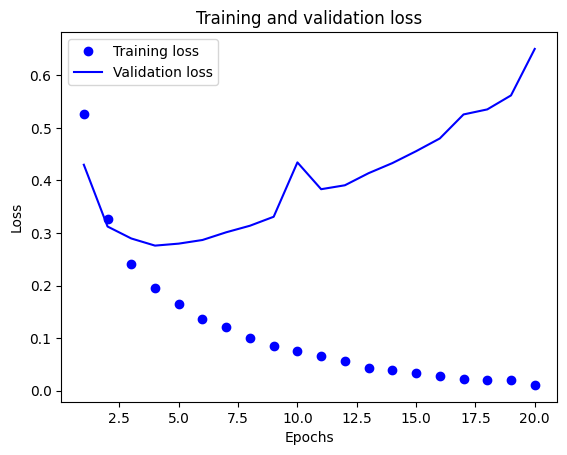

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot the Training and Validation Losses